In [9]:
ls

images/  README.md  src/  volcanoe-data/  vov_nb.ipynb


In [1]:
import pandas as pd

### The Kaggle file provides 4 folders: 
volcanoes_test ,  Volcanoes_test,  volcanoes_train,  Volcanoes_train

#### I check df.equals() on the training sets and they see, to be the exact same files

In [11]:
X_train = pd.read_csv('volcanoe-data/volcanoes_train/train_images.csv',header= None)

In [12]:
y_train_lower = pd.read_csv('volcanoe-data/volcanoes_train/train_labels.csv')

In [5]:
y_train_upper = pd.read_csv('volcanoe-data/Volcanoes_train/train_labels.csv')

In [6]:
y_train_lower.equals(y_train_upper)

True

#### The two y train sets seem to be exactly the same too. So, I will choose the lower case one

In [13]:
X = X_train
y = y_train_lower

In [16]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,12090,12091,12092,12093,12094,12095,12096,12097,12098,12099
0,95,101,99,103,95,86,96,89,70,104,...,111,107,92,89,103,99,117,116,118,96
1,91,92,91,89,92,93,96,101,107,104,...,103,92,93,95,98,105,104,100,90,81
2,87,70,72,74,84,78,93,104,106,106,...,84,71,95,102,94,80,91,80,84,90
3,0,0,0,0,0,0,0,0,0,0,...,94,81,89,84,80,90,92,80,88,96
4,114,118,124,119,95,118,105,116,123,112,...,116,113,102,93,109,104,106,117,111,115


In [17]:
X.shape

(7000, 12100)

In [14]:
y.head()

,Volcano?,Type,Radius,Number Volcanoes
0,1,3.0,17.46,1.0
1,0,NaN,NaN,NaN
2,0,NaN,NaN,NaN
3,0,NaN,NaN,NaN
4,0,NaN,NaN,NaN


In [18]:
y.shape

(7000, 4)

**Lets check the balence of the classes before we split our data for training**

In [10]:
ls


images/  README.md  src/  volcanoe-data/  vov_nb.ipynb


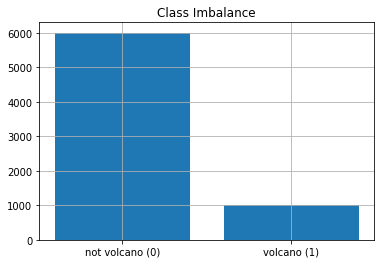

In [5]:
from src.volcanoe import class_imbalanced_plot
import matplotlib.pyplot as plt
class_imbalanced_plot(y)

**I will have to choose a technique for resampleing. there are sevrale ways to deal with imbalenced class:**
 - Augmentaion: create more minority class images by flipping, rotating, croping, or changing image quality of samples and saving as new samples
 - Under sampleing: by why throw out data - may cause over fitting
 - SMOTE: sintheticaly making more samples from minority class samples
 - weighting classes: (I read that this does work will woth image data)
 
**I Think what i wil do is try my model with both smoting and augmentation at some point. Firsti will go with smoteing becaseu for my spacific data set , al images are with the same exact resolutotion and croping.**

**Lets try making a few synthetic samples of volcano imahges and see who they looks**

**But first lets do a train test split**

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=.20, random_state=666)

In [9]:
from src.volcanoe import volcano_images


In [2]:
import matplotlib.pyplot as plt



In [37]:
def volcano_images(X, y,samp=5):
    pos_samples = X[y['Volcano?'] == 1].sample(10)
    neg_samples = X[y['Volcano?'] == 0].sample(10)
    fig, axs = plt.subplots(2,5)
    for i, ax in enumerate(axs.flatten()):
        if i < 6:
            ax.set_xticks([])
            ax.set_yticks([])
            ax.imshow(pos_samples.iloc[i,:].values.reshape((110,110)),cmap='Purples')
        if i > 5:
            ax.set_xticks([])
            ax.set_yticks([])
            ax.imshow(neg_samples.iloc[i,:].values.reshape((110,110)),cmap='Purples')
    axs[0][0].set_ylabel('volcano')
    axs[1][0].set_ylabel('no volcano')
    #axs.axis('off')
    
    #plt.tight_layout()

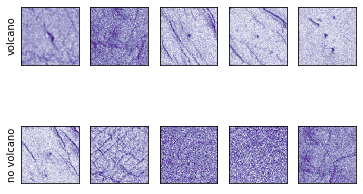

In [38]:
volcano_images(X,y)

In [42]:
import tensorflow as tf

ModuleNotFoundError: No module named 'tensorflow'